In [25]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [26]:
G = nx.barabasi_albert_graph(2000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [27]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 984
Number of deinfluenced nodes: 0
Number of susceptible nodes: 1016
influencer {900, 1286, 1671, 1160, 1543, 141, 1294, 782, 1168, 789, 790, 1305, 1691, 1821, 39, 1448, 1193, 1449, 681, 1576, 1197, 432, 1329, 1074, 691, 1078, 1213, 962, 1483, 1868, 716, 1358, 79, 1881, 348, 478, 227, 1127, 1511, 874, 747, 1516, 1644, 1132, 887, 1389, 1652, 759, 1528, 382}


In [28]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers)
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': {60}, 'Degree': set()}), (3, {'Random': {513}, 'Degree': set()}), (4, {'Random': {1690, 935}, 'Degree': set()}), (5, {'Random': {59, 567}, 'Degree': set()}), (6, {'Random': {1544, 1265, 1975}, 'Degree': set()}), (7, {'Random': {1873, 1010, 397}, 'Degree': set()}), (8, {'Random': {747, 796, 300, 235}, 'Degree': set()}), (9, {'Random': {657, 523, 1301, 823}, 'Degree': set()}), (10, {'Random': {1156, 1644, 12, 719}, 'Degree': set()}), (11, {'Random': {1000, 520, 1101, 114, 222}, 'Degree': set()}), (12, {'Random': {1793, 1573, 809, 1359, 531, 123}, 'Degree': set()}), (13, {'Random': {644, 1831, 1098, 1770, 301, 822, 1718}, 'Degree': {0}}), (14, {'Random': {547, 946, 1172, 1879, 831}, 'Degree': {0}}), (15, {'Random': {131, 581, 1099, 753, 1875, 1428, 661, 343, 1177}, 'Degree': {0}}), (16, {'Random': {193, 417, 1409, 904, 715, 1743, 1202, 1182}, 'Degree': {0}}), (17, {'Random': {18, 824, 1715, 312, 90, 1723, 1180}, 'Degree': {0}}), (18

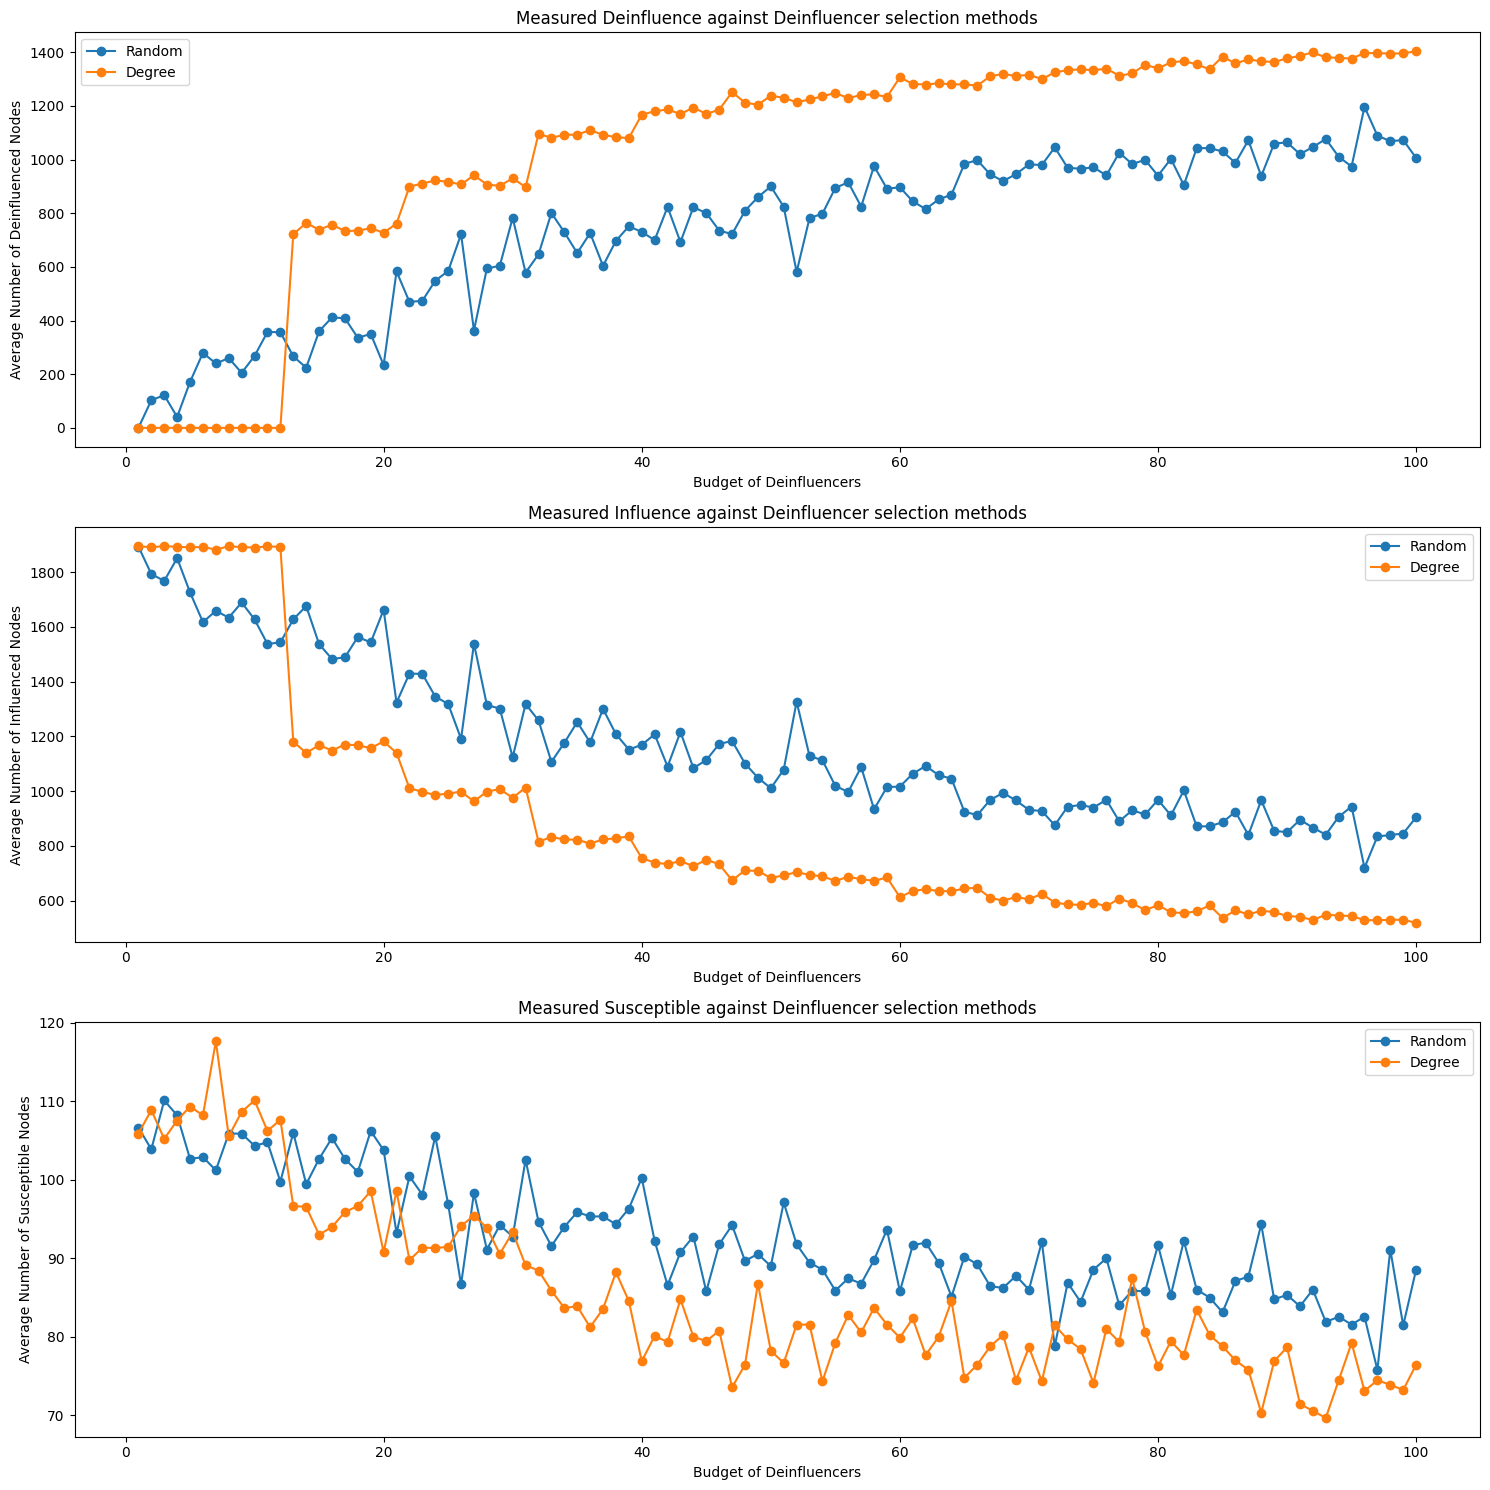

In [29]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()